In [1]:
# import of standard python libraries
import numpy as np
import numpy.linalg as lin
import pandas as pd
import pickle
import argparse

from sklearn.linear_model import ridge_regression
import matplotlib.pyplot as plt

from utils_convex import *

In [2]:
# REAL DATA
#the name of the dataset which you wish to run
# filename="diabetes"
# filename="breastcancer"
# X,y = data_loader(filename=filename)

#SYNTHETIC DATA
n = 100
n_test = 1000
d = 10
alpha = 0.5
sigma = 1

Sigma = alpha*np.ones((d,d)) + (1-alpha)*np.eye(d)
theta_star = np.ones(d)

X = np.random.multivariate_normal(np.zeros(d), Sigma, n)
y = X@theta_star + sigma*np.random.randn(n)

X_test = np.random.multivariate_normal(np.zeros(d), Sigma, n_test)
y_test = X_test@theta_star + sigma*np.random.randn(n_test)



#Regularization parameter
lambda_reg = 0

#Smoothness parameter
n=X.shape[0]

H = (X.T@X)/n + lambda_reg* np.eye(len(X[0]))
L = np.linalg.norm(H, axis=(0,1) , ord=2)
print(L)
#Calculation of the optimal solutions
theta_star_2, Loss_star = linear_regression(X, y, lambda_reg)

#Choose the number of executions for the algorithm to calculate means and variances
executions = 3
T = 100000
print(T)
eta = 0.1

5.163106650700008
100000


In [3]:
#Run and Evaluate GD
Gdruns = []
Gdruns_test = []
for i in range(executions):
  Gd,Gd_Losses,Gd_Losses_test,Gd_FOs = GD(X, y, np.zeros_like(X[0]), eta/(L), T//n, lambda_reg, X_test, y_test)
  Gdruns.append(Gd_Losses)
  Gdruns_test.append(Gd_Losses_test)

print(Gdruns[0][-1], Loss_star)

1.2293087302858372 1.2293013593711462


In [4]:
#Run and Evaluate SGD
Sgdruns = []
Sgdruns_test = []
for i in range(executions):
  Sgd,Sgd_Losses,Sgd_Losses_test,Sgd_FOs = SGD(X, y, np.zeros_like(X[0]), eta/(L), T, lambda_reg, X_test, y_test)
  Sgdruns.append(Sgd_Losses)
  Sgdruns_test.append(Sgd_Losses_test)

print(Sgdruns[0][-1], Loss_star)

1.2295474303756777 1.2293013593711462


In [5]:
#Run and Evaluate SVRG
SVRGruns = []
SVRGruns_test = []
for i in range(executions):
  print(T//(2*n), 2*n)
  SVRG_theta,SVRG_Losses,SVRG_Losses_test,SVRG_FOs = SVRG(X, y, np.zeros_like(X[0]), eta/L, T//(12*n), 5*n, lambda_reg, X_test, y_test)
  SVRGruns.append(SVRG_Losses)
  SVRGruns_test.append(SVRG_Losses_test)
print(SVRGruns[0][-1], Loss_star)

500 200
500 200
500 200
1.2293013593711464 1.2293013593711462


100000 100000


Text(0, 0.5, '$\\log(L(\\theta) - L^{\\star})$')

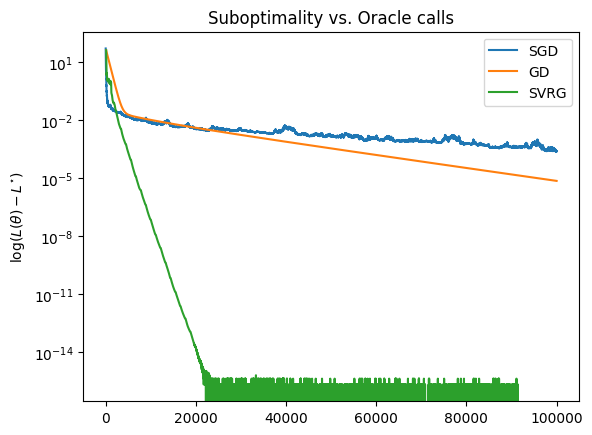

In [6]:
start = 0

print(len(Sgd_FOs), len(Sgdruns[0]))
plt.plot(Sgd_FOs[start:],Sgdruns[0][start:]-Loss_star, label = 'SGD')
plt.plot(Gd_FOs[start:],Gdruns[0][start:]-Loss_star, label = 'GD')
plt.plot(SVRG_FOs[start:],SVRGruns[0][start:]-Loss_star, label = 'SVRG')

plt.yscale('log')
plt.legend()
plt.title('Suboptimality vs. Oracle calls')
plt.ylabel('$\log(L(\\theta) - L^{\star})$')

100000 100000


Text(0, 0.5, '$\\log(L(\\theta) - L^{\\star})$')

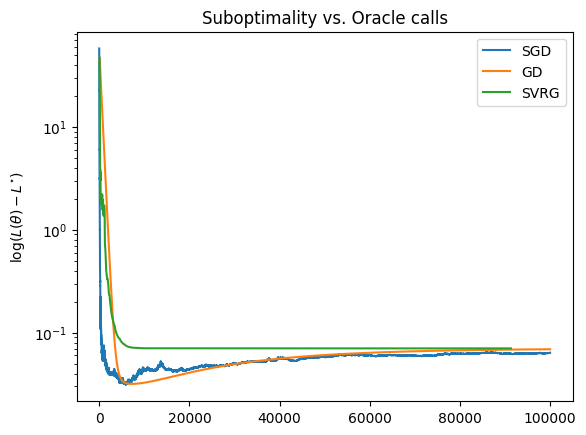

In [7]:
start = 0

Loss_star_test = Loss(theta_star,X_test, y_test, 0)

print(len(Sgd_FOs), len(Sgdruns[0]))
plt.plot(Sgd_FOs[start:],Sgdruns_test[0][start:]-Loss_star_test, label = 'SGD')
plt.plot(Gd_FOs[start:],Gdruns_test[0][start:]-Loss_star_test, label = 'GD')
plt.plot(SVRG_FOs[start:],SVRGruns_test[0][start:]-Loss_star_test, label = 'SVRG')

plt.yscale('log')
plt.legend()
plt.title('Suboptimality vs. Oracle calls')
plt.ylabel('$\log(L(\\theta) - L^{\star})$')


## Convergence rates

In [8]:
#SYNTHETIC DATA
n = 100
n_test = 1000
d = 10
alpha = 0.5
sigma = 1

Sigma = alpha*np.ones((d,d)) + (1-alpha)*np.eye(d)
theta_star = np.ones(d)

X = np.random.multivariate_normal(np.zeros(d), Sigma, n)
y = X@theta_star + sigma*np.random.randn(n)

X_test = np.random.multivariate_normal(np.zeros(d), Sigma, n_test)
y_test = X_test@theta_star + sigma*np.random.randn(n_test)

#Regularization parameter
lambda_reg = 0


H = (X.T@X)/n + lambda_reg* np.eye(len(X[0]))
L = np.linalg.norm(H, axis=(0,1) , ord=2)
print(L)
#Calculation of the optimal solutions
theta_star_2, Loss_star = linear_regression(X, y, lambda_reg)

#Choose the number of executions for the algorithm to calculate means and variances
executions = 3
T = 100000
print(T)
eta = 0.1

#Run and Evaluate GD
print('GD')
Gdruns = []
Gdruns_test = []
for i in range(executions):
  df = {'FOs':[], 'Loss_train':[], 'Loss_test':[], 'Optimal_loss_train':[]}
  print(i)
  Gd,Gd_Losses,Gd_Losses_test,Gd_FOs = GD(X, y, np.zeros_like(X[0]), eta/(L), T//n, lambda_reg, X_test, y_test)
  Gdruns.append(Gd_Losses)
  Gdruns_test.append(Gd_Losses_test)
  df['FOs'] = Gd_FOs
  df['Loss_train'] = Gd_Losses
  df['Loss_test'] = Gd_Losses_test
  df['Optimal_loss_train'] = (Loss_star*np.ones_like(Gd_Losses)).tolist()
  filename = f'GD_seed{i}_n{n}_d{d}_alpha{alpha}_sigma{sigma}_lambda{lambda_reg}_T{T}.csv'
  pd.DataFrame(df).to_csv(os.path.join('results',filename), index=False)
  print(Gdruns[0][-1], Loss_star)


#Run and Evaluate SGD
Sgdruns = []
Sgdruns_test = []
for i in range(executions):
  df = {'FOs':[], 'Loss_train':[], 'Loss_test':[], 'Optimal_loss_train':[]}
  print(i)
  Sgd,Sgd_Losses,Sgd_Losses_test,Sgd_FOs = SGD(X, y, np.zeros_like(X[0]), eta/(L), T, lambda_reg, X_test, y_test)
  Sgdruns.append(Sgd_Losses)
  Sgdruns_test.append(Sgd_Losses_test)
  df['FOs'] = Sgd_FOs
  df['Loss_train'] = Sgd_Losses
  df['Loss_test'] = Sgd_Losses_test
  df['Optimal_loss_train'] = (Loss_star*np.ones_like(Sgd_Losses)).tolist()
  filename = f'SGD_seed{i}_n{n}_d{d}_alpha{alpha}_sigma{sigma}_lambda{lambda_reg}_T{T}.csv'
  pd.DataFrame(df).to_csv(os.path.join('results',filename), index=False)
print(Sgdruns[0][-1], Loss_star)


#Run and Evaluate SVRG
SVRGruns = []
SVRGruns_test = []
for i in range(executions):
  df = {'FOs':[], 'Loss_train':[], 'Loss_test':[], 'Optimal_loss_train':[]}
  print(i)
  SVRG_theta,SVRG_Losses,SVRG_Losses_test,SVRG_FOs = SVRG(X, y, np.zeros_like(X[0]), eta/L, T//(12*n), 5*n, lambda_reg, X_test, y_test)
  SVRGruns.append(SVRG_Losses)
  SVRGruns_test.append(SVRG_Losses_test)
  df['FOs'] = SVRG_FOs
  df['Loss_train'] = SVRG_Losses
  df['Loss_test'] = SVRG_Losses_test
  df['Optimal_loss_train'] = (Loss_star*np.ones_like(SVRG_Losses)).tolist()
  filename = f'SVRG_seed{i}_n{n}_d{d}_alpha{alpha}_sigma{sigma}_lambda{lambda_reg}_T{T}.csv'
  pd.DataFrame(df).to_csv(os.path.join('results',filename), index=False)
print(SVRGruns[0][-1], Loss_star)

4.307047093065283
100000
GD
0
0.9488764035733468 0.94887639802629
1
0.9488764035733468 0.94887639802629
2
0.9488764035733468 0.94887639802629
0
1
2
0.9493054502262196 0.94887639802629
0
1
2
0.9488763980262896 0.94887639802629


## Generalization gap v.s. n

In [6]:
#SYNTHETIC DATA
n_test = 1000
d = 10
alpha = 0.5
sigma = 1

Sigma = alpha*np.ones((d,d)) + (1-alpha)*np.eye(d)
theta_star = np.ones(d)

X_test = np.random.multivariate_normal(np.zeros(d), Sigma, n_test)
y_test = X_test@theta_star + sigma*np.random.randn(n_test)

#Regularization parameter
lambda_reg = 0

#Choose the number of executions for the algorithm to calculate means and variances
executions = 3
eta = 0.1

T = 500000

df = {'n':[], 'method':[], 'Loss_train_mean':[], 'Loss_test_mean':[], 'Gap_mean':[], 'Gap_std':[]}
#[1,5,10,50,100,500,1000,2000,10000]
for n in [10000,2000,1000,500,100,50,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]:
    X = np.random.multivariate_normal(np.zeros(d), Sigma, n)
    y = X@theta_star + sigma*np.random.randn(n)

    H = (X.T@X)/n + lambda_reg* np.eye(len(X[0]))
    L = np.linalg.norm(H, axis=(0,1) , ord=2)
    print('n',n,L)
        
    #Run and Evaluate GD
    print('GD')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        Gd,Gd_Losses,Gd_Losses_test,Gd_FOs = GD(X, y, np.zeros_like(X[0]), eta/(L), T//n, lambda_reg, X_test, y_test)
        train_losses.append(Gd_Losses[-1])
        test_losses.append(Gd_Losses_test[-1])
    df['n'].append(n)
    df['method'].append('GD')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_test_mean'].append(np.mean(test_losses))
    df['Gap_mean'].append(np.mean(np.array(test_losses)-np.array(train_losses)))
    df['Gap_std'].append(np.std(np.array(test_losses)-np.array(train_losses)))


    #Run and Evaluate SGD
    print('SGD')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        Sgd,Sgd_Losses,Sgd_Losses_test,Sgd_FOs = SGD(X, y, np.zeros_like(X[0]), eta/(L), T, lambda_reg, X_test, y_test)
        train_losses.append(Sgd_Losses[-1])
        test_losses.append(Sgd_Losses_test[-1])
    
    df['n'].append(n)
    df['method'].append('SGD')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_test_mean'].append(np.mean(test_losses))
    df['Gap_mean'].append(np.mean(np.array(test_losses)-np.array(train_losses)))
    df['Gap_std'].append(np.std(np.array(test_losses)-np.array(train_losses)))


    #Run and Evaluate SVRG
    print('SVRG')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        SVRG_theta,SVRG_Losses,SVRG_Losses_test,SVRG_FOs = SVRG(X, y, np.zeros_like(X[0]), eta/L, T//(12*n), 5*n, lambda_reg, X_test, y_test)
        print(SVRG_Losses[-1])
        train_losses.append(SVRG_Losses[-1])
        test_losses.append(SVRG_Losses_test[-1])

    df['n'].append(n)
    df['method'].append('SVRG')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_test_mean'].append(np.mean(test_losses))
    df['Gap_mean'].append(np.mean(np.array(test_losses)-np.array(train_losses)))
    df['Gap_std'].append(np.std(np.array(test_losses)-np.array(train_losses)))

filename = f'Generalization_vs_n_d{d}_alpha{alpha}_sigma{sigma}_lambda{lambda_reg}.csv'
pd.DataFrame(df).to_csv(os.path.join('results',filename), index=False)


n 10000 5.417954881139419
GD
0
1
2
SGD
0
1
2
SVRG
0
0.9993614316953281
1
0.9993614316951486
2
0.9993614316952429
n 2000 5.297172394102351
GD
0
1
2
SGD
0
1
2
SVRG
0
0.9928013914194725
1
0.9928013914194718
2
0.9928013914194721
n 1000 6.043356675449399
GD
0
1
2
SGD
0
1
2
SVRG
0
1.0209434375481017
1
1.0209434375481021
2
1.0209434375481028
n 500 6.33081368306408
GD
0
1
2
SGD
0
1
2
SVRG
0
1.0521031427110399
1
1.05210314271104
2
1.0521031427110397
n 100 4.571983677066075
GD
0
1
2
SGD
0
1
2
SVRG
0
0.850914984937366
1
0.8509149849373658
2
0.8509149849373656
n 50 6.210264436140758
GD
0
1
2
SGD
0
1
2
SVRG
0
0.9003903585463994
1
0.9003903585463991
2
0.9003903585463991
n 20 7.152737395231801
GD
0
1
2
SGD
0
1
2
SVRG
0
0.8716384234015535
1
0.8716384234015532
2
0.871638423401554
n 19 3.847826577521445
GD
0
1
2
SGD
0
1
2
SVRG
0
0.25619149512903244
1
0.2561914951290326
2
0.2561914951290325
n 18 3.5004151393814658
GD
0
1
2
SGD
0
1
2
SVRG
0
0.24907687556979027
1
0.24907687556979027
2
0.24907687556979027
n

## Regularization

In [ ]:
#SYNTHETIC DATA
n = 100
n_test = 1000
d = 10
alpha = 0.5
sigma = 1

Sigma = alpha*np.ones((d,d)) + (1-alpha)*np.eye(d)
theta_star = np.ones(d)

X_test = np.random.multivariate_normal(np.zeros(d), Sigma, n_test)
y_test = X_test@theta_star + sigma*np.random.randn(n_test)

#Regularization parameter
#lambda_reg = 0

#Choose the number of executions for the algorithm to calculate means and variances
executions = 3
eta = 0.1
T = 500000

X = np.random.multivariate_normal(np.zeros(d), Sigma, n)
y = X@theta_star + sigma*np.random.randn(n)


df = {'lambda':[], 'method':[], 'Loss_train_mean':[], 'Loss_test_mean':[], 'Loss_train_std':[], 'Loss_test_std':[], 'Gap_mean':[], 'Gap_std':[]}
#[1,5,10,50,100,500,1000,2000,10000]
for lambda_reg in [0,1e-2,1e-1,0.125,0.15,0.175,2e-1,3e-1,4e-1,5e-1,6e-1,7e-1,8e-1,8e-1,1]:
   
    H = (X.T@X)/n + lambda_reg* np.eye(len(X[0]))
    L = np.linalg.norm(H, axis=(0,1) , ord=2)
    print('lambda',lambda_reg,L)
    #Run and Evaluate GD
    print('GD')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        Gd,Gd_Losses,Gd_Losses_test,Gd_FOs = GD(X, y, np.zeros_like(X[0]), eta/(L), T//n, lambda_reg, X_test, y_test)
        train_losses.append(Loss(Gd, X , y, 0))
        test_losses.append(Loss(Gd, X_test , y_test , 0))
    df['lambda'].append(lambda_reg)
    df['method'].append('GD')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_test_mean'].append(np.mean(test_losses))
    df['Loss_train_std'].append(np.std(train_losses))
    df['Loss_test_std'].append(np.std(test_losses))
    df['Gap_mean'].append(np.mean(np.array(test_losses)-np.array(train_losses)))
    df['Gap_std'].append(np.std(np.array(test_losses)-np.array(train_losses)))


    #Run and Evaluate SGD
    print('SGD')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        Sgd,Sgd_Losses,Sgd_Losses_test,Sgd_FOs = SGD(X, y, np.zeros_like(X[0]), eta/(L), T, lambda_reg, X_test, y_test)
        train_losses.append(Loss(Sgd, X , y, 0))
        test_losses.append(Loss(Sgd, X_test , y_test , 0))
    
    df['lambda'].append(lambda_reg)
    df['method'].append('SGD')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_test_mean'].append(np.mean(test_losses))
    df['Loss_train_std'].append(np.std(train_losses))
    df['Loss_test_std'].append(np.std(test_losses))
    df['Gap_mean'].append(np.mean(np.array(test_losses)-np.array(train_losses)))
    df['Gap_std'].append(np.std(np.array(test_losses)-np.array(train_losses)))


    #Run and Evaluate SVRG
    print('SVRG')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        SVRG_theta,SVRG_Losses,SVRG_Losses_test,SVRG_FOs = SVRG(X, y, np.zeros_like(X[0]), eta/L, T//(12*n), 5*n, lambda_reg, X_test, y_test)
        print(SVRG_Losses[-1])
        train_losses.append(Loss(SVRG_theta, X , y, 0))
        test_losses.append(Loss(SVRG_theta, X_test , y_test , 0))

    df['lambda'].append(lambda_reg)
    df['method'].append('SVRG')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_test_mean'].append(np.mean(test_losses))
    df['Loss_train_std'].append(np.std(train_losses))
    df['Loss_test_std'].append(np.std(test_losses))
    df['Gap_mean'].append(np.mean(np.array(test_losses)-np.array(train_losses)))
    df['Gap_std'].append(np.std(np.array(test_losses)-np.array(train_losses)))

    filename = f'Generalization_vs_lambda_d{d}_alpha{alpha}_sigma{sigma}_n{n}.csv'
    pd.DataFrame(df).to_csv(os.path.join('results',filename), index=False)


lambda 0 5.640829811235927
GD
0
1
2
SGD
0
1
2
SVRG
0
0.7365478086175137
1
0.7365478086175139
2
0.7365478086175137
lambda 0.01 5.650829811235928
GD
0
1
2
SGD
0
1
2
SVRG
0
0.8435506233373515
1
0.8435506233373511
2
0.8435506233373514
lambda 0.1 5.740829811235928
GD
0
1
2
SGD
0
1
2
SVRG
0
1.7876469935149901
1
1.78764699351499
2
1.78764699351499
lambda 0.125 5.765829811235929
GD
0
1
2
SGD
0
1
2
SVRG
0
2.044130584816688
1
2.044130584816688
2
2.0441305848166875
lambda 0.15 5.790829811235927
GD
0
1
2
SGD
0
1
2
SVRG
0
2.2982218216884434
1
2.2982218216884434
2
2.298221821688444
lambda 0.175 5.815829811235928
GD
0
1
2
SGD
0
1
2
SVRG
0
2.5499724171420084
1
2.5499724171420084
2
2.5499724171420084
lambda 0.2 5.84082981123593
GD
0
1
2
SGD
0
1
2
SVRG
0
2.7994299552534008
1
2.7994299552534008
2
2.7994299552534003
lambda 0.3 5.940829811235927
GD
0
1
2
SGD
0
1
2
SVRG
0
3.775172455001412
1
3.7751724550014125
2
3.775172455001412
lambda 0.4 6.040829811235928
GD
0
1
2
SGD
0
1
2
SVRG
0
4.717331813702675
1
4.7

## Making the problem ill-conditioned

In [5]:
#SYNTHETIC DATA
n = 100
n_test = 1000
d = 10
sigma = 1


theta_star = np.ones(d)

#Regularization parameter
lambda_reg = 0.1

#Choose the number of executions for the algorithm to calculate means and variances
executions = 3
eta = 0.1
T = 500000

df = {'alpha':[], 'method':[], 'Loss_train_mean':[], 'Loss_train_std':[],'Loss_optimal':[]}
#[1,5,10,50,100,500,1000,2000,10000]
for alpha  in [1,0.999999,0.99999,0.9999,0.999,0.99,0.9,0.8,0.7,0.6,0.5]:#[0,1e-1,2e-1,3e-1,4e-1,5e-1,6e-1,7e-1,8e-1,9e-1,1]:
    Sigma = alpha*np.ones((d,d)) + (1-alpha)*np.eye(d)

    X = np.random.multivariate_normal(np.zeros(d), Sigma, n)
    y = X@theta_star + sigma*np.random.randn(n)
    
    X_test = np.random.multivariate_normal(np.zeros(d), Sigma, n_test)
    y_test = X_test@theta_star + sigma*np.random.randn(n_test)

    H = (X.T@X)/n + lambda_reg* np.eye(len(X[0]))
    L = np.linalg.norm(H, axis=(0,1) , ord=2)
    print('alpha',alpha,L)

    try:
        theta_hat, Loss_hat = linear_regression(X, y, lambda_reg)
    except:
        print('Singular matrix')
        theta_hat = np.zeros_like(X[0])

    #Run and Evaluate GD
    print('GD')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        Gd,Gd_Losses,Gd_Losses_test,Gd_FOs = GD(X, y, np.zeros_like(X[0]), eta/(L), T//n, lambda_reg, X_test, y_test)
        train_losses.append(Loss(Gd, X , y, 0))
        test_losses.append(Loss(Gd, X_test , y_test , 0))
    df['alpha'].append(alpha)
    df['method'].append('GD')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_train_std'].append(np.std(train_losses))
    df['Loss_optimal'].append(Loss(theta_hat, X , y, 0))


    #Run and Evaluate SGD
    print('SGD')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        Sgd,Sgd_Losses,Sgd_Losses_test,Sgd_FOs = SGD(X, y, np.zeros_like(X[0]), eta/(L), T, lambda_reg, X_test, y_test)
        train_losses.append(Loss(Sgd, X , y, 0))
        test_losses.append(Loss(Sgd, X_test , y_test , 0))
    
    df['alpha'].append(alpha)
    df['method'].append('SGD')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_train_std'].append(np.std(train_losses))
    df['Loss_optimal'].append(Loss(theta_hat, X , y, 0))


    #Run and Evaluate SVRG
    print('SVRG')
    train_losses = []
    test_losses = []
    for i in range(executions):
        print(i)
        SVRG_theta,SVRG_Losses,SVRG_Losses_test,SVRG_FOs = SVRG(X, y, np.zeros_like(X[0]), eta/L, T//(12*n), 5*n, lambda_reg, X_test, y_test)
        print(SVRG_Losses[-1])
        train_losses.append(Loss(SVRG_theta, X , y, 0))
        test_losses.append(Loss(SVRG_theta, X_test , y_test , 0))

    df['alpha'].append(alpha)
    df['method'].append('SVRG')
    df['Loss_train_mean'].append(np.mean(train_losses))
    df['Loss_train_std'].append(np.std(train_losses))
    df['Loss_optimal'].append(Loss(theta_hat, X , y, 0))

    filename = f'Alpha_exp_d{d}_lambda{lambda_reg}_sigma{sigma}_n{n}.csv'
    pd.DataFrame(df).to_csv(os.path.join('results',filename), index=False)


alpha 1 10.52567046408572
GD
0
1
2
SGD
0
1
2
SVRG
0
1.8495980645020604
1
1.8495980645020604
2
1.8495980645020609
alpha 0.999999 10.828333361282292
GD
0
1
2
SGD
0
1
2
SVRG
0
2.0566065102642637
1
2.056606510264263
2
2.0566065102642637
alpha 0.99999 9.213751233708216
GD
0
1
2
SGD
0
1
2
SVRG
0
2.163973663717118
1
2.1639736637171185
2
2.163973663717118
alpha 0.9999 10.579263238563081
GD
0
1
2
SGD
0
1
2
SVRG
0
2.0885983595399815
1
2.088598359539981
2
2.088598359539981
alpha 0.999 8.385867677981594
GD
0
1
2
SGD
0
1
2
SVRG
0
1.9770167968727643
1
1.9770167968727648
2
1.9770167968727643
alpha 0.99 9.632047575265116
GD
0
1
2
SGD
0
1
2
SVRG
0
1.9150692289859315
1
1.9150692289859312
2
1.9150692289859312
alpha 0.9 7.652513247874826
GD
0
1
2
SGD
0
1
2
SVRG
0
2.0605418263267836
1
2.0605418263267827
2
2.0605418263267836
alpha 0.8 10.937829481983858
GD
0
1
2
SGD
0
1
2
SVRG
0
1.9526416238417648
1
1.9526416238417645
2
1.9526416238417648
alpha 0.7 6.800018415905253
GD
0
1
2
SGD
0
1
2
SVRG
0
1.9010385594127